<a href="https://colab.research.google.com/github/MEDHANGSHI0708/Women-s-Safety-GOOGLE_DEV_CLUB-/blob/main/Safety_detection_for_women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the dataset zip file
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded {filename} ({len(uploaded[filename])} bytes)')

Saving dataset.zip to dataset.zip
Uploaded dataset.zip (8945356 bytes)


In [2]:
import zipfile

# Path to the uploaded zip file
zip_path = list(uploaded.keys())[0]  # Get the name of the uploaded zip file

# List the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    print("Contents of the zip file:")
    for file in zip_contents:
        print(file)

Contents of the zip file:
dataset/
dataset/harrasment/
dataset/harrasment/images (1).jpg
dataset/harrasment/IMG-20250209-WA0098.jpg
dataset/harrasment/IMG-20250209-WA0099.jpg
dataset/harrasment/IMG-20250209-WA0100.jpg
dataset/harrasment/IMG-20250209-WA0101.jpg
dataset/harrasment/IMG-20250209-WA0102.jpg
dataset/harrasment/IMG-20250209-WA0103.jpg
dataset/harrasment/IMG-20250209-WA0104.jpg
dataset/harrasment/IMG-20250209-WA0105.jpg
dataset/harrasment/IMG-20250209-WA0106.jpg
dataset/harrasment/IMG-20250209-WA0107.jpg
dataset/harrasment/IMG-20250209-WA0108.jpg
dataset/harrasment/IMG-20250209-WA0109.jpg
dataset/harrasment/IMG-20250209-WA0110.jpg
dataset/harrasment/IMG-20250209-WA0111.jpg
dataset/harrasment/IMG-20250209-WA0112.jpg
dataset/harrasment/IMG-20250209-WA0113.jpg
dataset/harrasment/IMG-20250209-WA0114.jpg
dataset/harrasment/IMG-20250209-WA0115.jpg
dataset/harrasment/IMG-20250209-WA0116.jpg
dataset/harrasment/IMG-20250209-WA0117.jpg
dataset/harrasment/IMG-20250209-WA0118.jpg
dataset/

In [3]:
import os
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Verify the dataset structure
dataset_dir = '/content/dataset'  # Adjust this path based on the zip structure
print(os.listdir(dataset_dir))  # Should show ['harassment', 'non_harassment']

['non_harrasment', 'harrasment']


In [4]:
import os

dataset_dir = '/content/dataset'
print("Contents of the dataset directory:")
print(os.listdir(dataset_dir))

# Check the contents of the subfolders
if 'harassment' in os.listdir(dataset_dir):
    print("\nContents of the 'harassment' folder:")
    print(os.listdir(os.path.join(dataset_dir, 'harassment')))

if 'non_harassment' in os.listdir(dataset_dir):
    print("\nContents of the 'non_harassment' folder:")
    print(os.listdir(os.path.join(dataset_dir, 'non_harassment')))

Contents of the dataset directory:
['non_harrasment', 'harrasment']


In [5]:
!pip install split-folders

In [6]:
import splitfolders
import os

In [7]:
input_folder = '/content/dataset'  # Path to your dataset directory
output_folder = '/content/data_splits'  # Path to store the splits

In [8]:
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))

Copying files: 200 files [00:00, 4250.28 files/s]


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/data_splits/train'
val_dir = '/content/data_splits/val'
test_dir = '/content/data_splits/test'

# Image dimensions and batch size
img_height, img_width = 224, 224  # Standard size for many models
batch_size = 32

# Data generators with rescaling (normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (harassment vs non-harassment)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 159 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
# Augmentation for training data
train_aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Randomly zoom images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill missing pixels
)

# Apply augmentation to training data
train_generator = train_aug_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 159 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification (sigmoid output)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification loss
    metrics=['accuracy']
)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs to wait after the metric stops improving
    restore_best_weights=True  # Restore the best weights when training stops
)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=50,  # Set a high maximum number of epochs
    callbacks=[early_stopping]  # Add the early stopping callback
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5821 - loss: 2.5673 - val_accuracy: 0.5500 - val_loss: 0.6660
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6562 - loss: 0.6377 - val_accuracy: 0.5000 - val_loss: 1.0680
Epoch 3/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 635ms/step - accuracy: 0.5845 - loss: 0.8907 - val_accuracy: 0.5000 - val_loss: 0.8268
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4375 - loss: 0.8389 - val_accuracy: 0.5000 - val_loss: 0.7214
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 0.5771 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6740
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5161 - loss: 0.6794 - val_accuracy: 0.5500 - val_loss: 0.6747


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.4720 - loss: 0.7274

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4854 - loss: 0.7228 - val_accuracy: 0.7500 - val_loss: 0.6614 - learning_rate: 0.0010
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5806 - loss: 0.6872

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5806 - loss: 0.6872 - val_accuracy: 0.8000 - val_loss: 0.6550 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5773 - loss: 0.6723

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5753 - loss: 0.6717 - val_accuracy: 0.7500 - val_loss: 0.6233 - learning_rate: 0.0010
Epoch 4/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7188 - loss: 0.6448

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7188 - loss: 0.6448 - val_accuracy: 0.7500 - val_loss: 0.6037 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 729ms/step - accuracy: 0.6808 - loss: 0.5916 - val_accuracy: 0.6000 - val_loss: 0.7987 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6562 - loss: 0.7639 - val_accuracy: 0.5500 - val_loss: 0.7512 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.6253 - loss: 0.8544

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6215 - loss: 0.8445 - val_accuracy: 0.8000 - val_loss: 0.5462 - learning_rate: 0.0010
Epoch 8/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6875 - loss: 0.5555

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6875 - loss: 0.5555 - val_accuracy: 0.8000 - val_loss: 0.5435 - learning_rate: 0.0010
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.7233 - loss: 0.5831

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7208 - loss: 0.5842 - val_accuracy: 0.8000 - val_loss: 0.5293 - learning_rate: 0.0010
Epoch 10/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5806 - loss: 0.6671

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5806 - loss: 0.6671 - val_accuracy: 0.8000 - val_loss: 0.5239 - learning_rate: 0.0010
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.7285 - loss: 0.5799

4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7281 - loss: 0.5765 - val_accuracy: 0.7500 - val_loss: 0.4737 - learning_rate: 0.0010
Epoch 12/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7419 - loss: 0.5455

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7419 - loss: 0.5455 - val_accuracy: 0.8500 - val_loss: 0.4282 - learning_rate: 0.0010
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 697ms/step - accuracy: 0.7167 - loss: 0.5564 - val_accuracy: 0.8500 - val_loss: 0.4495 - learning_rate: 0.0010
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7742 - loss: 0.5484 - val_accuracy: 0.8000 - val_loss: 0.4322 - learning_rate: 0.0010
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.6987 - loss: 0.5525 - val_accuracy: 0.8000 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5625 - loss: 0.6819 - val_accuracy: 0.8000 - val_loss: 0.4366 - learning_rate: 2.0000e-04
Epoch 17/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 0.7046 - loss: 0.5216 - val_accuracy: 0.8500 - val_loss: 0.4285 - learning_rate: 2.0000e-04


In [14]:
#model ki evaluation krmegee
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6000 - loss: 0.6604
Test Accuracy: 60.00%


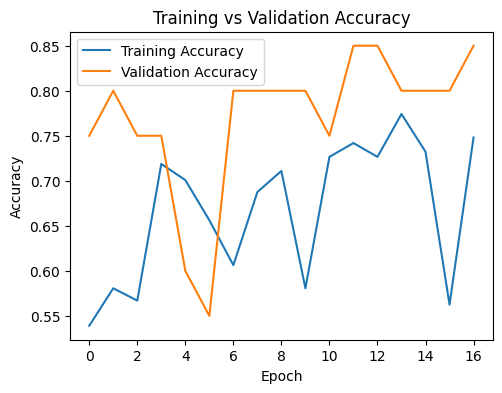

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

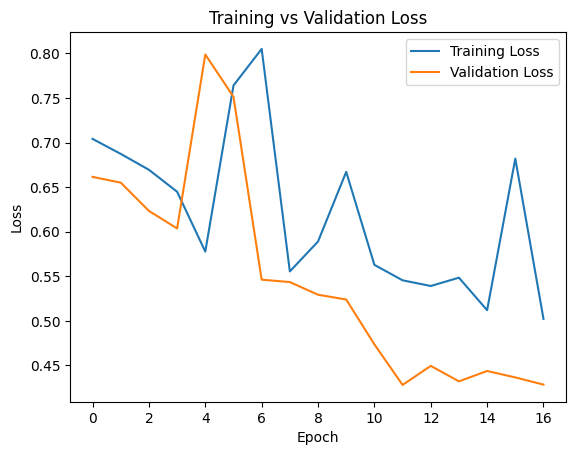

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Classification Report:
                precision    recall  f1-score   support

Non-Harassment       0.50      0.40      0.44        10
    Harassment       0.50      0.60      0.55        10

      accuracy                           0.50        20
     macro avg       0.50      0.50      0.49        20
  weighted avg       0.50      0.50      0.49        20

Confusion Matrix:
[[4 6]
 [4 6]]


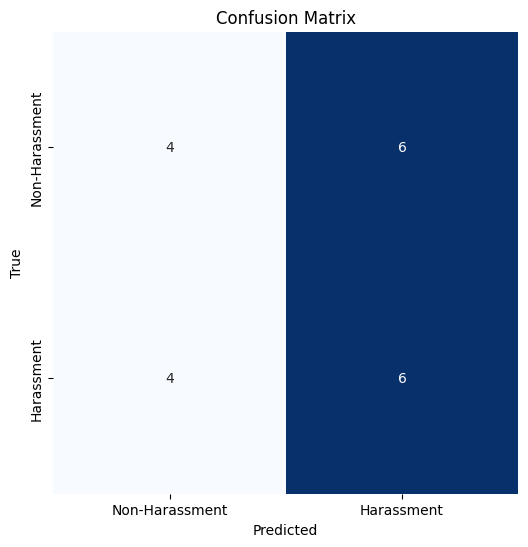

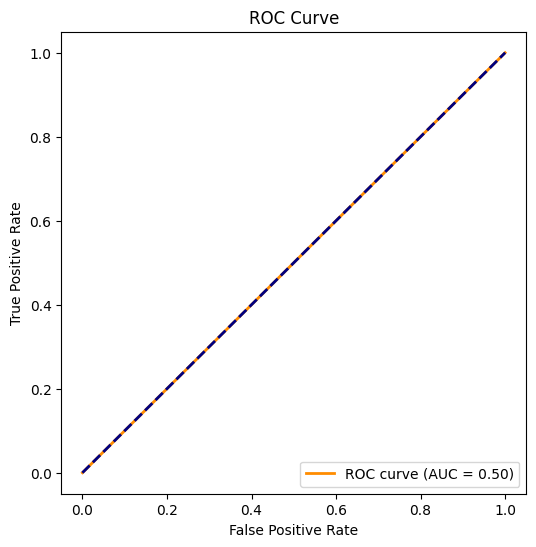

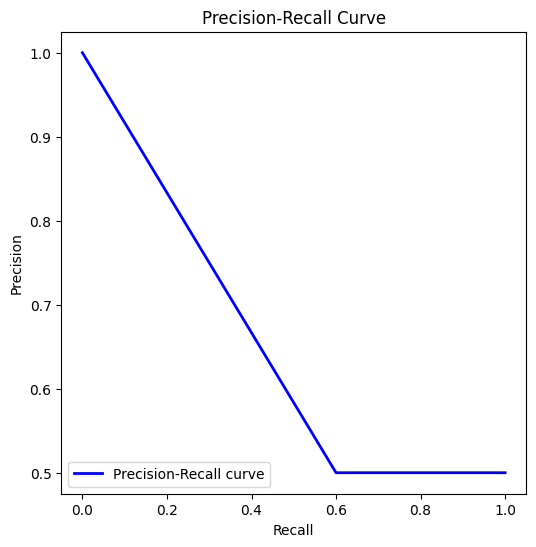

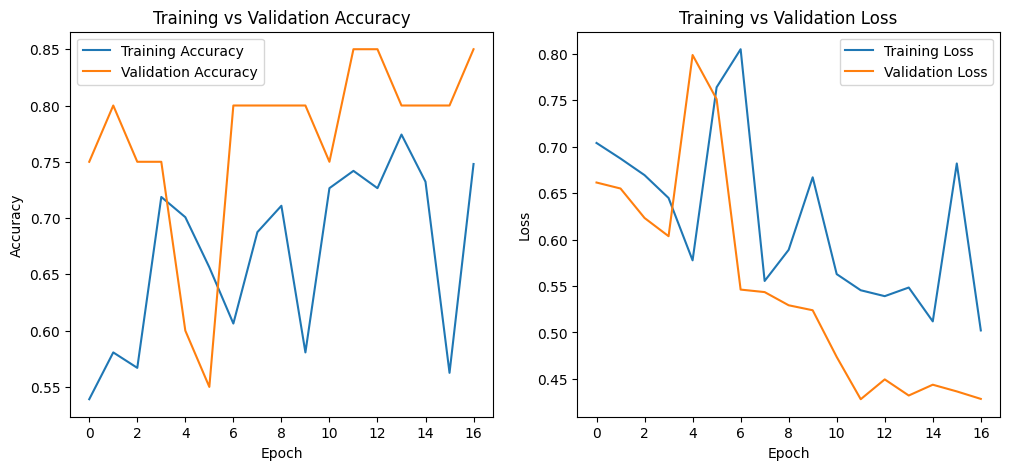

In [17]:
# Step 1: Import Libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Evaluate the Model on the Test Set
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Harassment', 'Harassment']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Harassment', 'Harassment'],
            yticklabels=['Non-Harassment', 'Harassment'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Step 3: Plot Training vs Validation Metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
# Step 9: Save the Model
model.save('harassment_classifier.h5')

In [19]:
# Step 10: Make Predictions (Optional)
from tensorflow.keras.preprocessing import image
import numpy as np

# Load a sample image
img_path = '/content/data_splits/test/harrasment/IMG-20250209-WA0129.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

In [20]:
# Make prediction
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Prediction: Harassment")
else:
    print("Prediction: Non-Harassment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: Harassment


In [21]:
!pip install gradio==3.35.2

INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 

In [22]:
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: aiofiles
    Found existing installation: aiofiles 24.1.0
    Uninstalling aiofiles-24.1.0:
      Successfully uninstalled aiofiles-24.1.0
  Attempting uninstall: gradio
    Found existing installation: gradio 3.35.2
    Uninstalling gradio-3.35.2:
      Successfully uninstalled gradio-3.35.2


In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img):
    try:
        # Resize the image to the input size of the model
        img = img.resize((224, 224))

        # Convert the image to a numpy array and normalize it
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Normalize

        # Make prediction
        prediction = model.predict(img_array)

        # Return the result
        if prediction[0] > 0.5:
            return "NON-Harassment"
        else:
            return "Harassment"
    except Exception as e:
        return f"Error: {str(e)}"

In [24]:
import gradio as gr

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_image,  # Function to call for predictions
    inputs=gr.Image(type="pil", label="Upload Image"),  # Input is an image (PIL format)
    outputs="text",  # Output is a text label
    title="Harassment vs Non-Harassment Classifier",
    description="Upload an image from your local machine to classify it as Harassment or Non-Harassment."
)

# Launch the interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6f8bbcfe17903aa891.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
